# **1A. Data Import**

Read the data from the csv files.

In [1]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import cohen_kappa_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
degen_toonz = pd.read_csv("./drive/MyDrive/Colab Notebooks/labelled-Degen-Toonz-final.csv")
dented_feels = pd.read_csv("./drive/MyDrive/Colab Notebooks/labelled-DentedFeels-final.csv")
cosmic_cats = pd.read_csv("./drive/MyDrive/Colab Notebooks/labelled-Cosmic-Cats-correct-final.csv")
cosmodinos = pd.read_csv("./drive/MyDrive/Colab Notebooks/labelled-Cosmodinos-correct-final.csv")
all_raw_data = pd.concat([dented_feels, degen_toonz, cosmic_cats, cosmodinos])
all_raw_data

,AuthorID,Author,Date,Content,Attachments,Reactions,Label,Audit
0,6.106750e+17,Aaronito#5711,27-Feb-22 5:23,@here please use this channel to talk about p...,NaN,"❤️ (22),💯 (11),👍 (6),stonks (5),pepehype (2)",NaN,NaN
1,4.094424e+17,GameControl21#7254,27-Feb-22 5:23,first,NaN,NaN,NaN,NaN
2,5.309327e+17,elijah#0069,27-Feb-22 5:23,sup,NaN,NaN,NaN,NaN
3,4.094424e+17,GameControl21#7254,27-Feb-22 5:23,third,NaN,NaN,NaN,NaN
4,2.372131e+17,!kudasai#9527,27-Feb-22 5:23,sup,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1444,9.189644e+17,jettothenext#1861,09-Mar-22 01:52,Man I love how it’s a whole another channel of...,NaN,NaN,NaN,NaN
1445,6.551406e+17,jsjs1#0987,09-Mar-22 13:16,right? this is seems to be like a haven to sta...,NaN,NaN,NaN,NaN
1446,8.645110e+17,itslaflame#7888,09-Mar-22 13:49,"We have to take opportunity of the market, gla...",NaN,NaN,NaN,NaN
1447,8.678642e+17,NFTjourneh#8334,09-Mar-22 18:52,Yuhhh,NaN,NaN,NaN,NaN


# **1B. Data Issues: Sampling Bias**

As the data was labelled manually, the messages were carefully picked such that all messages that express bullish or bearish sentiment were equally likely to be selected.

# **1B. Data Issues: Data Imbalance**

The plot below shows that there are more messages that express bullish sentiment than bearish. As the data set is rather small, the bearish data was resampled so that there is equal number of messages from both classes.

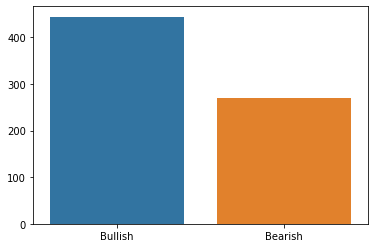

In [4]:
labelled_data = all_raw_data.loc[all_raw_data['Label'].notnull()]
labelled_data = labelled_data.sample(frac=1).reset_index(drop=True)

dd = pd.Series(labelled_data['Label'].values).value_counts()
sns.barplot(x=np.array(['Bullish','Bearish']), y=dd.values)
plt.show()

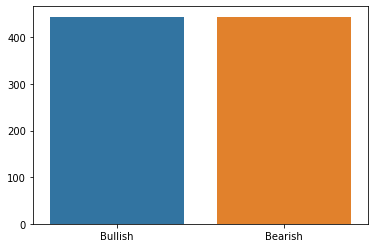

In [5]:
df_majority = labelled_data[labelled_data.Label == 1.0]
df_minority = labelled_data[labelled_data.Label == 0.0]

# Resample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=444,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

_data = df_upsampled
_data = _data.sample(frac=1).reset_index(drop=True)
 
# Display new class counts
dd = pd.Series(_data['Label'].values).value_counts()
sns.barplot(x=np.array(['Bullish','Bearish']), y=dd.values)
plt.show()

# **1B. Data Issues: Data Reliability**

Albeit usernames are given, they were not investigated as many online profiles are anonymous. The messages however come from real chats, where the users were not aware that their messages will be used for analysis. Therefore, we can trust that the data is representative of any other discord chatroom.

Data reliability was measured by measuring the inter annotator agreement.

In [22]:
df_kappa = _data.loc[(_data['Label'].notnull()), ['Label', 'Audit']]
df_kappa2 = df_kappa.loc[df_kappa['Audit'].notnull(), ['Label', 'Audit']]
print("Inter-annotator agreement: Kappa cohen score of ", cohen_kappa_score(df_kappa2['Label'].values, df_kappa2['Audit'].values))

Inter-annotator agreement: Kappa cohen score of  0.9684336822625663


# **1C. Data Preprocessing**

Extract the relevant columns and filter out the rows that are not labelled.

In [23]:
_data

,AuthorID,Author,Date,Content,Attachments,Reactions,Label,Audit
0,8.750519e+17,OGG#3060,02-Mar-22 16:30,My cats are goin to the moon,NaN,NaN,1.0,1.0
1,8.171321e+17,Mooooner#6852,24-Feb-22 16:12,"People keep buying above floor too, another ve...",NaN,NaN,1.0,1.0
2,2.928427e+17,juice#4688,17-Feb-22 19:47,Thats super low,NaN,NaN,0.0,0.0
3,5.984685e+17,Xrazybean#4260,24-Feb-22 07:16,Great price to buy right now.,NaN,NaN,1.0,1.0
4,9.223924e+17,Qamber#4533,21-Feb-22 10:05,Delisted mine,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...
883,8.742564e+17,Syazzy | MSC#6620,27-Feb-22 5:30,woot woot just swipe the floor!,NaN,NaN,1.0,1.0
884,9.330641e+17,Samurai d3f | Cosmic Cats#8040,02-Mar-22 22:27,Now everyone tryin to paperhand u cats lol,NaN,NaN,0.0,0.0
885,2.065917e+17,Bara#1337,21-Feb-22 10:10,yep if ppl delist wall not gonna be so thick,NaN,NaN,0.0,0.0
886,2.065917e+17,Bara#1337,21-Feb-22 10:10,yep if ppl delist wall not gonna be so thick,NaN,NaN,0.0,0.0


In [24]:
def clean_data(df_raw):
  df = df_raw.loc[df_raw['Label'].notnull(), ['Content', 'Label']]
  df.drop(df[df.Content.str.len() == 0].index, inplace=True)
  return df;

In [25]:
_data = clean_data(_data).sample(frac=1).reset_index(drop=True) # Clean and reshuffle
_data

,Content,Label
0,Ayo lfgg,1.0
1,Cuz we know u will go lower,0.0
2,Why is it going so low w,0.0
3,I thought the price will not go up thats why I...,0.0
4,floor will get ate up over night first night o...,1.0
...,...,...
883,Nice might buy some now,1.0
884,Watch that floor get swept after the announcem...,1.0
885,will we ever recover?,0.0
886,floor is lava and starting to rise,1.0


# **Import** libraries

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import nltk
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Set device

In [28]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
  device = torch.device("cuda")
  print("GPU is available")
else:
  device = torch.device("cpu")
  print("GPU not available, CPU used")

GPU not available, CPU used


# **Clean, Tokenize and Encode Message Text**

Split the columns in 2 different numpy arrays

In [29]:
X_raw, y = _data['Content'].values, _data['Label'].values

In [30]:
def preprocess_string(s):
  '''
  Helper function to process a message
  '''
  # Remove all non-word characters (everything except numbers and letters)
  s = re.sub(r"[^\w\s]", '', s)

  # Replace all runs of whitespaces with no space
  s = re.sub(r"\s+", '', s)
  
  # replace digits with no space
  s = re.sub(r"\d", '', s)

  return s

Tokenize a message and remove stop words except the 'not' token, which is important as it may be used to express the opposite sentiment.

In [31]:
def tokenize_encode(x):
  word_list = []

  # Filter out stop words except 'not'
  stop_words = set(stopwords.words('english')) 
  for sent in x:
    for word in sent.lower().split():
      word = preprocess_string(word)
      if (word not in stop_words and word != '') or word == 'not':  # Preserve the not word for negation
        word_list.append(word)

  corpus = Counter(word_list)
  
  # sorting on the basis of most common words
  corpus_ = sorted(corpus, key=corpus.get,reverse=True)[:5000]

  # creating a dict
  onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
  
  # encode the words
  final_list = []
  for sent in x:
    final_list.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
  
  return np.array(final_list, dtype=object), onehot_dict

In [32]:
X, vocab = tokenize_encode(X_raw)

In [33]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 902


Analyse message length

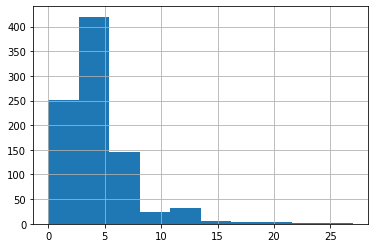

count    888.000000
mean       4.327703
std        3.242134
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       27.000000
dtype: float64

In [34]:
msg_len = [len(i) for i in X]
pd.Series(msg_len).hist()
plt.show()
pd.Series(msg_len).describe()

Mean review length is 4 words, max is 27.

# **Padding**

Pad each sequence to max length

In [35]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len), dtype=int)
  for ii, review in enumerate(sentences):
    if len(review) != 0:
      features[ii, -len(review):] = np.array(review)[:seq_len]
  return features

In [36]:
x_pad = padding_(X, 30)

# **Define the Model**

Define the Bi-directional LSTM

In [37]:
class LSTM(nn.Module):
  def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim=64, 
               output_dim=1, drop_prob=0.5, bidirectional=True):
    super(LSTM, self).__init__()

    self.output_dim = output_dim
    self.hidden_dim = hidden_dim
    self.no_layers = no_layers
    self.vocab_size = vocab_size

    # embedding and LSTM layers
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    
    #lstm
    self.lstm = nn.LSTM(input_size=embedding_dim,
                        hidden_size=self.hidden_dim,
                        num_layers=no_layers,
                        batch_first=True,
                        bidirectional=bidirectional)
    
    # dropout layer
    self.dropout = nn.Dropout(drop_prob)

    # linear and sigmoid layer
    self.fc = nn.Linear(self.hidden_dim, output_dim)
    self.sig = nn.Sigmoid()


  def forward(self, x, hidden):
    batch_size = x.size(0)

    # embeddings and lstm_out
    embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True

    lstm_out, hidden = self.lstm(embeds, hidden)
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
    
    # dropout and fully connected layer
    out = self.dropout(lstm_out)
    out = self.fc(out)
    sig_out = self.sig(out)
    
    # reshape to be batch_size first
    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:, -1] # get last batch of labels
    
    # return last sigmoid output and hidden state
    return sig_out, hidden


  def init_hidden(self, batch_size):
    ''' Initializes hidden state '''

    # Create two new tensors with sizes (n_layers x 2) x batch_size x hidden_dim
    # initialized to zero, for hidden state and cell state of LSTM
    # n_layers x 2 because it is bidirectional LSTM
    h0 = torch.zeros((self.no_layers*2, batch_size, self.hidden_dim)).to(device)
    c0 = torch.zeros((self.no_layers*2, batch_size, self.hidden_dim)).to(device)
    hidden = (h0, c0)

    return hidden

# **Training**

Perform a K-fold cross validation. The dataset is small, and the K-fold CV ensures each data sample is used as testing, so that there are no lucky partitions.

In [38]:
def acc(pred, label):
  '''
  Function to predict accuracy
  '''
  pred = torch.round(pred.squeeze())
  return torch.sum(pred == label.squeeze()).item()

In [39]:
def plot_acc_loss_graph(epoch_tr_acc, epoch_vl_acc, epoch_tr_loss, epoch_vl_loss):
  '''
  Plots the training and validation accuracy and loss
  '''
  # Accuracy
  fig = plt.figure(figsize = (20, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epoch_tr_acc, label='Train Acc')
  plt.plot(epoch_vl_acc, label='Validation Acc')
  plt.title("Accuracy")
  plt.legend()
  plt.grid()

  # Training
  plt.subplot(1, 2, 2)
  plt.plot(epoch_tr_loss, label='Train loss')
  plt.plot(epoch_vl_loss, label='Validation loss')
  plt.title("Loss")
  plt.legend()
  plt.grid()
  plt.show()

Fold:  1
Epoch 1
train_loss : 0.6927730019499616 val_loss : 0.6694488525390625
train_accuracy : 50.15151515151515 val_accuracy : 64.0
Validation loss decreased (inf --> 0.669449).  Saving model ...

Epoch 2
train_loss : 0.6577226519584656 val_loss : 0.60234401623408
train_accuracy : 63.787878787878796 val_accuracy : 78.0
Validation loss decreased (0.669449 --> 0.602344).  Saving model ...

Epoch 3
train_loss : 0.5352151888172801 val_loss : 0.4791138966878255
train_accuracy : 75.30303030303031 val_accuracy : 68.0
Validation loss decreased (0.602344 --> 0.479114).  Saving model ...

Epoch 4
train_loss : 0.4159190534818463 val_loss : 0.40741241971651715
train_accuracy : 80.60606060606061 val_accuracy : 76.0
Validation loss decreased (0.479114 --> 0.407412).  Saving model ...

Epoch 5
train_loss : 0.2762959345084865 val_loss : 0.4616333991289139
train_accuracy : 89.6969696969697 val_accuracy : 72.0

Epoch 6
train_loss : 0.15764314590430842 val_loss : 0.45384085178375244
train_accuracy : 94

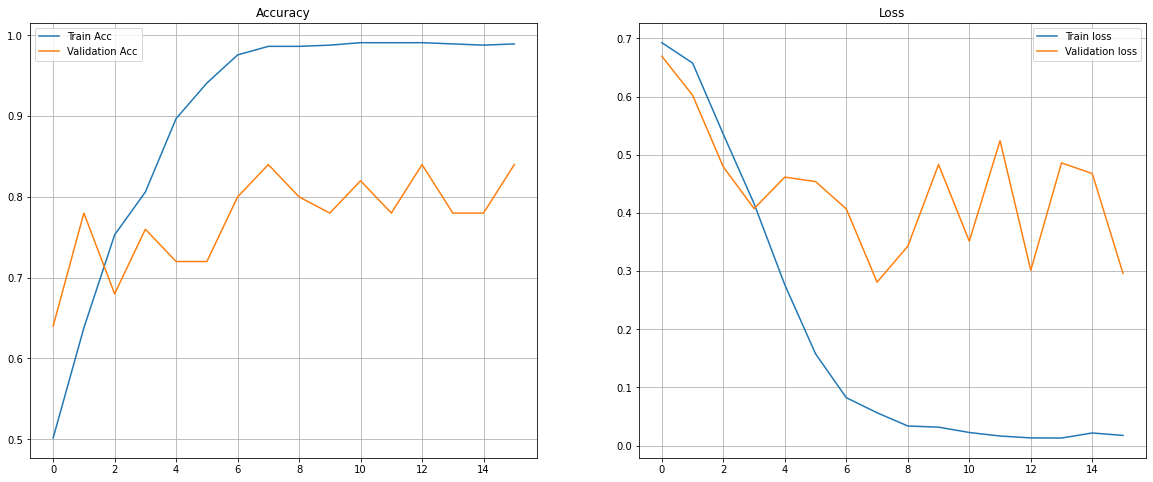

Fold:  2
Epoch 1
train_loss : 0.6912685719931998 val_loss : 0.6867107152938843
train_accuracy : 50.303030303030305 val_accuracy : 52.0

Epoch 2
train_loss : 0.6445153602739659 val_loss : 0.667181392510732
train_accuracy : 64.39393939393939 val_accuracy : 56.00000000000001

Epoch 3
train_loss : 0.525080803690887 val_loss : 0.6799450516700745
train_accuracy : 74.54545454545455 val_accuracy : 62.0

Epoch 4
train_loss : 0.3629959381935073 val_loss : 0.784707228342692
train_accuracy : 85.0 val_accuracy : 62.0

Epoch 5
train_loss : 0.25075454755527216 val_loss : 0.6468430757522583
train_accuracy : 90.45454545454545 val_accuracy : 72.0

Epoch 6
train_loss : 0.16048418830444172 val_loss : 0.6158752838770548
train_accuracy : 94.39393939393939 val_accuracy : 76.0

Epoch 7
train_loss : 0.10221207214564812 val_loss : 0.7319261233011881
train_accuracy : 96.06060606060606 val_accuracy : 76.0

Epoch 8
train_loss : 0.07377131971553332 val_loss : 0.6992067297299703
train_accuracy : 97.57575757575758 va

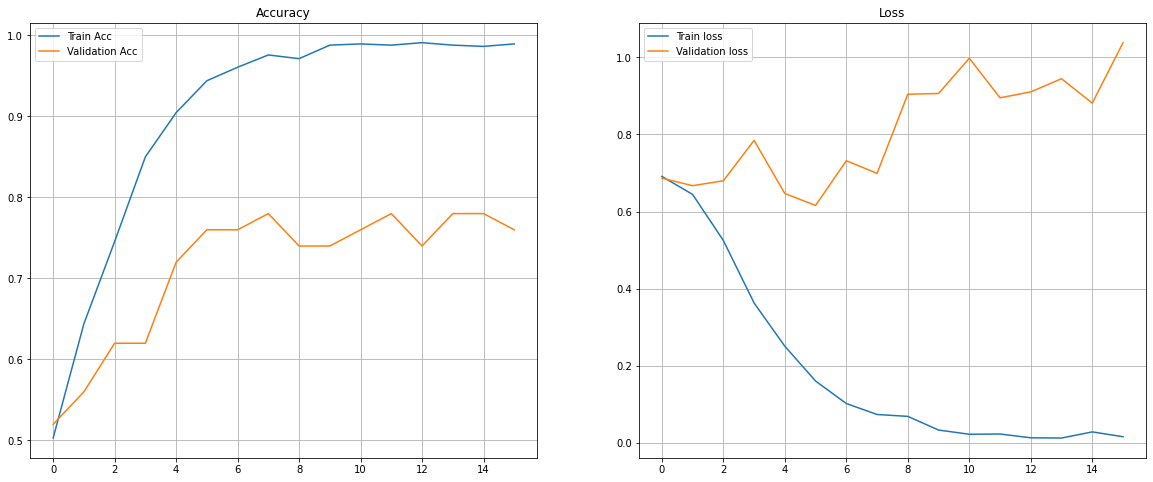

Fold:  3
Epoch 1
train_loss : 0.6869304267371573 val_loss : 0.7055718700091044
train_accuracy : 55.6060606060606 val_accuracy : 38.0

Epoch 2
train_loss : 0.6514206179758397 val_loss : 0.6222174366315206
train_accuracy : 61.06060606060606 val_accuracy : 68.0

Epoch 3
train_loss : 0.5062766743869316 val_loss : 0.532306174437205
train_accuracy : 76.96969696969697 val_accuracy : 68.0

Epoch 4
train_loss : 0.3526503792623194 val_loss : 0.521478126446406
train_accuracy : 86.06060606060606 val_accuracy : 68.0

Epoch 5
train_loss : 0.26347114836297386 val_loss : 0.5236869553724924
train_accuracy : 90.30303030303031 val_accuracy : 72.0

Epoch 6
train_loss : 0.1720723922296268 val_loss : 0.467410867412885
train_accuracy : 94.24242424242424 val_accuracy : 74.0

Epoch 7
train_loss : 0.13383770756786917 val_loss : 0.6441363493601481
train_accuracy : 94.0909090909091 val_accuracy : 74.0

Epoch 8
train_loss : 0.1100123101027637 val_loss : 0.4493582062423229
train_accuracy : 95.75757575757575 val_acc

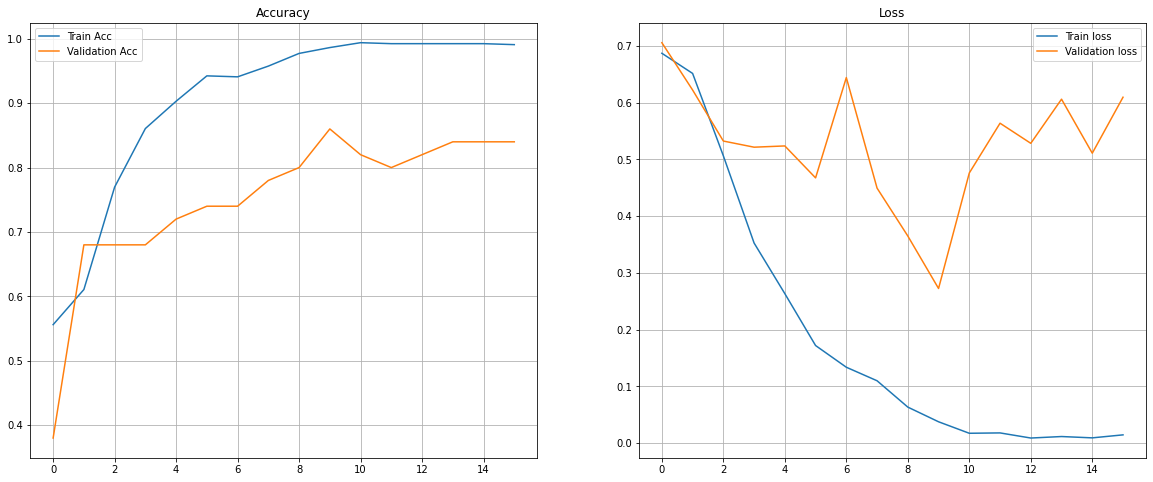

Fold:  4
Epoch 1
train_loss : 0.6867929348131505 val_loss : 0.685184101263682
train_accuracy : 54.16036308623298 val_accuracy : 54.0

Epoch 2
train_loss : 0.6297437861198332 val_loss : 0.6308695475260416
train_accuracy : 68.38124054462935 val_accuracy : 56.00000000000001

Epoch 3
train_loss : 0.49798997945901824 val_loss : 0.5546487172444662
train_accuracy : 76.39939485627836 val_accuracy : 68.0

Epoch 4
train_loss : 0.37556879912934654 val_loss : 0.420090119043986
train_accuracy : 84.56883509833585 val_accuracy : 74.0

Epoch 5
train_loss : 0.25716886451331583 val_loss : 0.2945883572101593
train_accuracy : 90.16641452344932 val_accuracy : 86.0

Epoch 6
train_loss : 0.1829073110186472 val_loss : 0.24234628429015478
train_accuracy : 93.64599092284418 val_accuracy : 86.0
Validation loss decreased (0.272569 --> 0.242346).  Saving model ...

Epoch 7
train_loss : 0.11708009697315169 val_loss : 0.25706029931704205
train_accuracy : 95.61270801815431 val_accuracy : 88.0

Epoch 8
train_loss : 0.

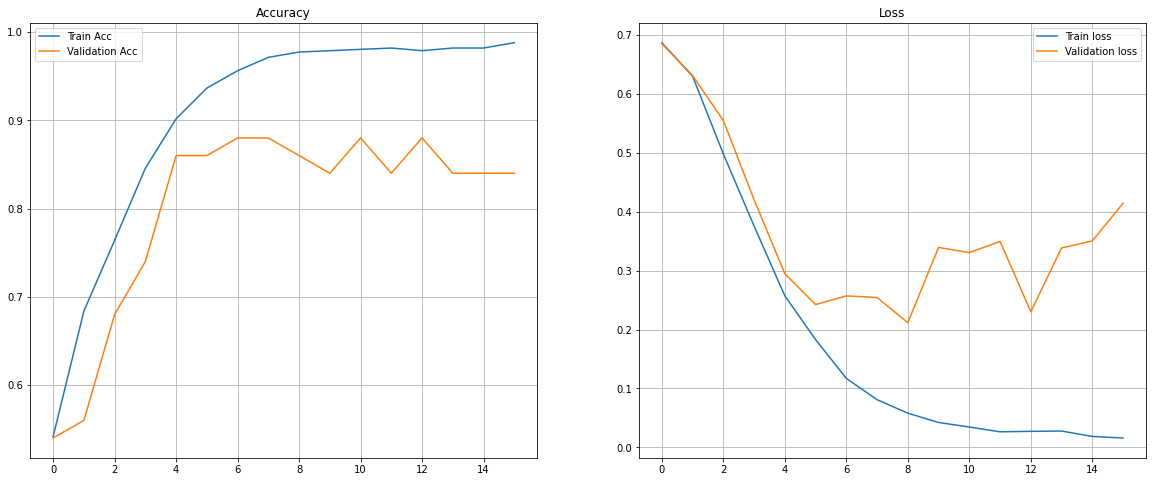

Fold:  5
Epoch 1
train_loss : 0.6888654304713737 val_loss : 0.6799107591311137
train_accuracy : 52.344931921331316 val_accuracy : 56.00000000000001

Epoch 2
train_loss : 0.6595779163081471 val_loss : 0.6332889795303345
train_accuracy : 61.57337367624811 val_accuracy : 66.0

Epoch 3
train_loss : 0.5416888049462947 val_loss : 0.5461010535558065
train_accuracy : 73.37367624810892 val_accuracy : 68.0

Epoch 4
train_loss : 0.3676093307937064 val_loss : 0.5323463082313538
train_accuracy : 85.02269288956127 val_accuracy : 78.0

Epoch 5
train_loss : 0.24532848741950058 val_loss : 0.3982924421628316
train_accuracy : 90.77155824508321 val_accuracy : 82.0

Epoch 6
train_loss : 0.13263588157914033 val_loss : 0.5415870149930319
train_accuracy : 94.70499243570349 val_accuracy : 70.0

Epoch 7
train_loss : 0.07256351484031212 val_loss : 0.5357361336549123
train_accuracy : 97.2768532526475 val_accuracy : 76.0

Epoch 8
train_loss : 0.05826297447812266 val_loss : 0.5995555818080902
train_accuracy : 97.57

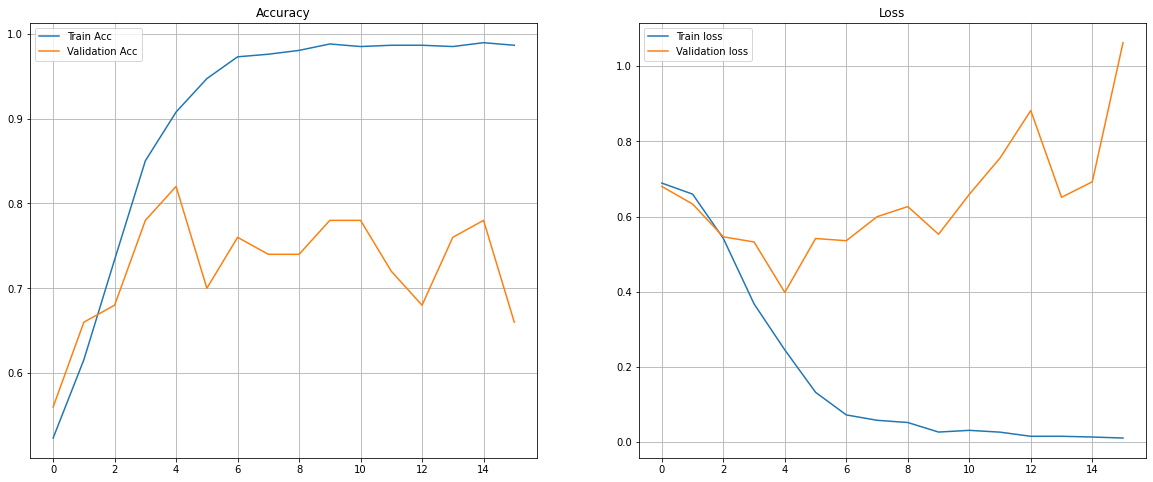

In [40]:
kf = KFold(n_splits=5) # 5-fold CV
fold = 1

# Hypter-parameters
batch_size = 16
lr = 0.001                    # Learning rate
clip = 5
epochs = 16
valid_loss_min = np.Inf       # Validation loss - initially set to INF
threshold = 0.5               # > threshold = bullish; <= threshold = bearish
no_layers = 2                 # Number of LSTM layers
vocab_size = len(vocab) + 1
embedding_dim = 64
output_dim = 1
hidden_dim = 64               # Number of neurons in a layer
bidirectional = True

predicted = []
true = []

for train_index, test_index in kf.split(x_pad):
  print("Fold: ", fold)
  print(25*"==")
  fold += 1

  model = LSTM(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5, bidirectional=bidirectional)
  model.to(device)

  # Separate test and train data
  x_train, y_train = x_pad[train_index], y[train_index]
  test_data, test_label = x_pad[test_index], y[test_index]

  # Take a small random subset to be the validation set
  train_data, valid_data, train_label, valid_label = train_test_split(x_train, y_train, test_size=0.07)

  # Criterion and optimizer
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  # train for some number of epochs
  epoch_tr_loss, epoch_vl_loss = [], []
  epoch_tr_acc, epoch_vl_acc = [], []

  # Create the data loaders
  train_loader = DataLoader(TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_label)), shuffle=True, batch_size=batch_size, drop_last=True)
  test_loader = DataLoader(TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_label)), shuffle=True, batch_size=batch_size, drop_last=True)
  valid_loader = DataLoader(TensorDataset(torch.from_numpy(valid_data), torch.from_numpy(valid_label)), shuffle=True, batch_size=batch_size, drop_last=True)

  train_losses = []

  for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()

    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
          
      model.zero_grad()
      output, h = model(inputs, h)
      
      # calculate the loss and perform back propagation
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()
      train_losses.append(loss.item())

      # calculate accuracy
      accuracy = acc(output, labels)
      train_acc += accuracy

      #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()

    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()

    for inputs, labels in valid_loader:
      val_h = tuple([each.data for each in val_h])

      inputs, labels = inputs.to(device), labels.to(device)
      output, val_h = model(inputs, val_h)
      val_loss = criterion(output.squeeze(), labels.float())
      val_losses.append(val_loss.item())
      
      accuracy = acc(output,labels)
      val_acc += accuracy

    # Get loss mean
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)

    # Get accuracy mean
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)

    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)

    # Print epoch results
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
      torch.save(model, './drive/MyDrive/Colab Notebooks/Models/state_dict.pt')
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, epoch_val_loss))
      valid_loss_min = epoch_val_loss
    print(25*'==')
    print()

  # Plot accuracy and loss graphs for this fold
  plot_acc_loss_graph(epoch_tr_acc, epoch_vl_acc, epoch_tr_loss, epoch_vl_loss)

  # Evaluate for this fold
  test_h = model.init_hidden(batch_size)
  test_losses = []
  test_acc = 0.0
  model.eval()

  # Used to create confusion matrix
  y_pred = []
  y_true = []

  for inputs, labels in test_loader:
    test_h = tuple([each.data for each in test_h])

    inputs, labels = inputs.to(device), labels.to(device)
    output, test_h = model(inputs, test_h)

    y_true.extend(labels.tolist())
    y_pred.extend((output > threshold).float().tolist())

  predicted.append(y_pred)
  true.append(y_true)

Create confusion matrices for each fold

Classification Report for fold:  1
              precision    recall  f1-score   support

           1     0.8485    0.8936    0.8705        94
           0     0.8701    0.8171    0.8428        82

    accuracy                         0.8580       176
   macro avg     0.8593    0.8553    0.8566       176
weighted avg     0.8586    0.8580    0.8576       176

Classification Report for fold:  2
              precision    recall  f1-score   support

           1     0.8261    0.7600    0.7917        75
           0     0.8318    0.8812    0.8558       101

    accuracy                         0.8295       176
   macro avg     0.8289    0.8206    0.8237       176
weighted avg     0.8294    0.8295    0.8285       176

Classification Report for fold:  3
              precision    recall  f1-score   support

           1     0.8889    0.7191    0.7950        89
           0     0.7596    0.9080    0.8272        87

    accuracy                         0.8125       176
   macro avg     0.8243

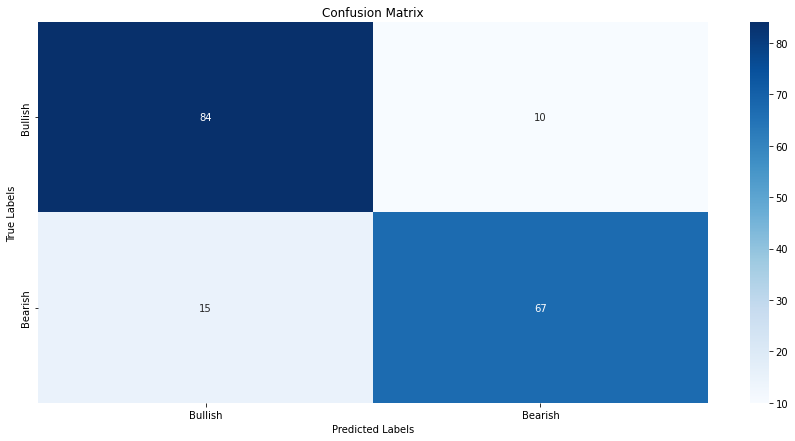

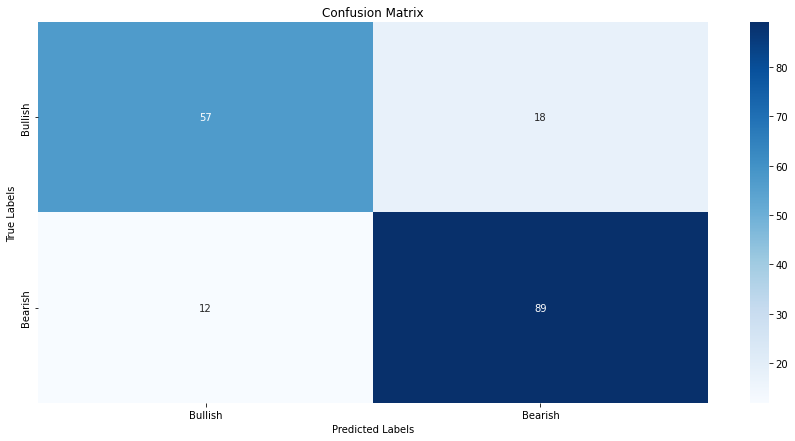

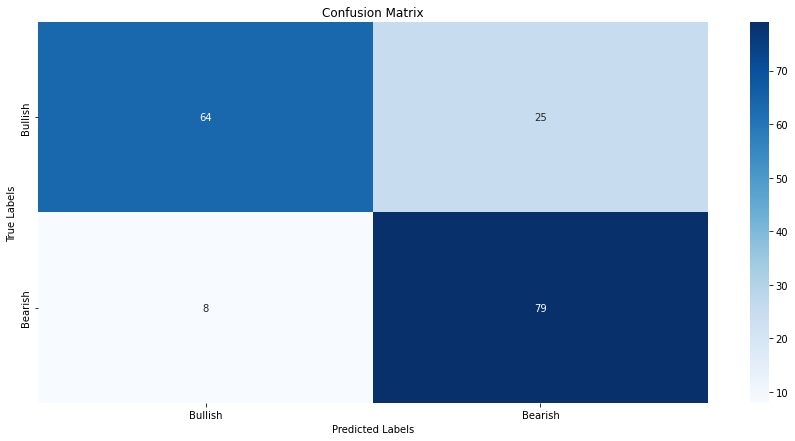

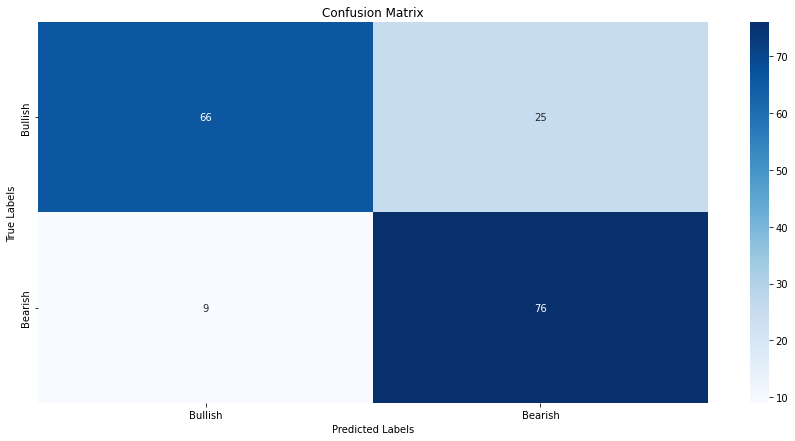

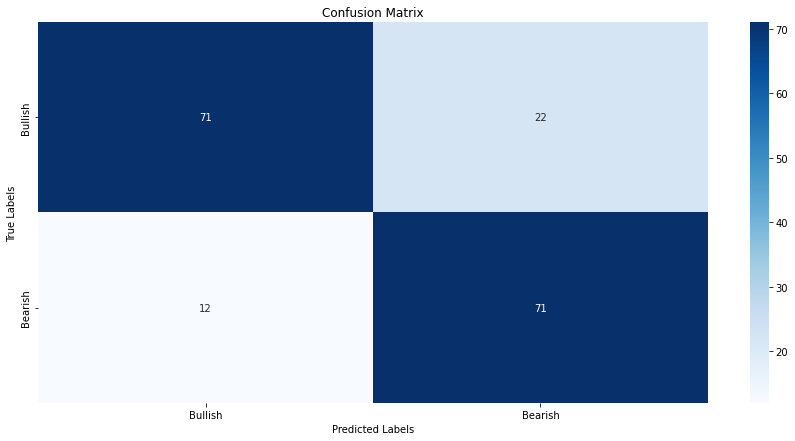

In [41]:
for i in range(len(predicted)):
  y_true = true[i]
  y_pred = predicted[i]

  print('Classification Report for fold: ', i + 1)
  print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
  
  cm = confusion_matrix(y_true, y_pred, labels=[1,0])
  fig = plt.figure(figsize = (15, 7))
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')

  ax.xaxis.set_ticklabels(['Bullish', 'Bearish'])
  ax.yaxis.set_ticklabels(['Bullish', 'Bearish'])

In [42]:
def predict(text, path='./drive/MyDrive/Colab Notebooks/Models/state_dict.pt'):
  word_seq = np.array([vocab[preprocess_string(word)] for word in text.lower().split() 
                         if preprocess_string(word) in vocab.keys()])
  word_seq = np.expand_dims(word_seq, axis=0)
  pad = torch.from_numpy(padding_(word_seq, 30))
  inputs = pad.to(device)
  batch_size = 1

  model = torch.load(path)
  model.eval()

  h = model.init_hidden(batch_size)
  h = tuple([each.data for each in h])

  output, h = model(inputs, h)
  return(output.item())

In [44]:
message = input("Enter message: ")
p = predict(message)
status = "bullish" if p > 0.5 else "bearish"
p = (1 - p) if status == "bearish" else p
print(f'Predicted status is {status} with a probability of {p}')

Enter message: So many paperhands
Predicted status is bearish with a probability of 0.9800736140459776


# **Problematic cases**

"How can you be happy woth this price" - identified as bullish with high confidence but it is actually bearish, as the price is really low.

"It's not gonna rise" - negations not recognised due to stop-word removal

"Price not good" - again, classified as bullish due to lack of such cases in the training data.

"If it reaches 50, I'd be delighted" - bullish with low confidence. It implies bullish but the model classified as bullish almost by chance (51% bullish vs 49% bearish)

"I wish it was going up instead" - clearly bearish since the author wishes the opposite was happening to what is actually happening (dropping).

Save the vocabulary along the model

In [47]:
import pickle
a_file = open("./drive/MyDrive/Colab Notebooks/data.pkl", "wb")
pickle.dump(vocab, a_file)
a_file.close()